# MQA performance evaluation for scop_cl_equal_globular100_identity95_coverage60

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from sklearn.metrics import mean_absolute_error, mean_squared_error
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)

In [2]:
def scatter(df, x='GDT_TS', y='Proposed', col_wrap=4):
    g = sns.relplot(data=df, kind='scatter', x=x, y=y, col='target', col_wrap=col_wrap)
    g.set(xlim=(0, 1), ylim=(0, 1))
    plt.subplots_adjust(wspace=0.1)

In [3]:
# boxplot and swarmplot for each group
def plot_metrics_group(df, metrics, hue=None, figsize=(10, 8), pointsize=4, order=None, hue_order=None):
    plt.figure(figsize=figsize)
    sns.boxplot(data=df, x=metrics, y='Method', orient='h', color='white', order=order)
    sns.swarmplot(data=df, x=metrics, y='Method', orient='h', hue=hue, size=pointsize, palette='Set2', order=order, hue_order=hue_order)
    plt.tight_layout()

In [4]:
from pathlib import Path
dataset_name = 'scop_cl_equal_globular100_identity95_coverage60'
score_dir = Path('../../../../score') / dataset_name
plot_dir = score_dir / 'plot' / 'MQA'
plot_dir.mkdir(parents=True, exist_ok=True)
# model score
tmscore_path = (score_dir / (dataset_name + '_final')).with_suffix('.csv')
tmscore_df = pd.read_csv(tmscore_path, index_col=0)
alignment_quality_row_columns = ['identity', 'positive', 'coverage', 'identity(-misres)', 'positive(-misres)', 'coverage(-misres)']
alignment_quality_columns = [c + '(%)' for c in alignment_quality_row_columns]
for c in alignment_quality_row_columns:
    tmscore_df[c + '(%)'] = tmscore_df[c] / tmscore_df['seq_len']
p3cmqa_df = pd.read_csv(score_dir / 'P3CMQA.csv', index_col=0).rename({'Score': 'P3CMQA'}, axis=1)
dope_df = pd.read_csv(score_dir / 'dope.csv', index_col=0)
proq3_df = pd.read_csv(score_dir / 'proq3.csv', index_col=0)
sbrod_df = pd.read_csv(score_dir / 'sbrod.csv', index_col=0)
dan_df = pd.read_csv(score_dir / 'DeepAccNet.csv', index_col=0)
method_df = pd.concat([p3cmqa_df, dope_df, dan_df, sbrod_df, proq3_df], axis=1)
df = pd.merge(tmscore_df, method_df, left_on='model', right_index=True)
df['dope'] = - df['dope']
df['soap'] = - df['soap']
rename_dict = {name: name.upper() for name in ['dope', 'soap', 'sbrod']}
df = df.rename(rename_dict, axis=1)
df.to_csv(score_dir / (dataset_name + '_final_all_score.csv'))
df

model  GDT_TS  GDT_HA  TMscore  target  template  seq_len  \
0      1AYZ_A_3OJ4_A_2_1   0.864   0.704    0.912  1AYZ_A  3OJ4_A_2      153   
1      1AYZ_A_4L83_A_3_3   0.858   0.678    0.907  1AYZ_A  4L83_A_3      153   
2      1AYZ_A_6TTU_D_1_5   0.851   0.678    0.898  1AYZ_A  6TTU_D_1      153   
3      1AYZ_A_4GPR_A_1_1   0.842   0.688    0.872  1AYZ_A  4GPR_A_1      153   
4      1AYZ_A_1TTE_A_3_5   0.657   0.423    0.787  1AYZ_A  1TTE_A_3      153   
...                  ...     ...     ...      ...     ...       ...      ...   
14620  6SPF_T_3PYO_T_2_1   0.862   0.707    0.853  6SPF_T  3PYO_T_2       94   
14621  6SPF_T_3J7Y_U_3_1   0.614   0.444    0.598  6SPF_T  3J7Y_U_3       94   
14622  6SPF_T_1PNU_R_2_4   0.790   0.590    0.775  6SPF_T  1PNU_R_2       94   
14623  6SPF_T_5O60_U_3_4   0.832   0.692    0.840  6SPF_T  5O60_U_3       94   
14624  6SPF_T_4BTD_X_2_1   0.891   0.750    0.891  6SPF_T  4BTD_X_2       94   

       identity  positive  coverage  ...  P3CMQA      DOPE      SOAP  \
0            55        89       145  ...   0.936 16173.431 87773.641   
1            50        82       150  ...   0.931 16108.172 79806.367   
2            56        90       143  ...   0.871 15592.919 75800.398   
3            55        89       139  ...   0.860 15673.749 81208.062   
4            44        79       149  ...   0.500 13570.403 34812.891   
...         ...       ...       ...  ...     ...       ...       ...   
14620        42        56        88  ...   0.801  7493.219 40997.273   
14621        27        46        92  ...   0.561  6795.809 34295.250   
14622        37        54        87  ...   0.726  7013.454 31020.203   
14623        36        49        87  ...   0.784  7647.284 42679.781   
14624        42        56        88  ...   0.796  7786.745 45151.395   

       DeepAccNet DeepAccNet-Bert  SBROD  ProQ2D  ProQRosCenD  ProQRosFAD  \
0           0.704           0.665  1.496   0.592        0.748       0.886   
1           0.611           0.625  1.502   0.607        0.733       0.888   
2           0.574           0.564  1.463   0.554        0.671       0.810   
3           0.668           0.622  1.475   0.512        0.566       0.809   
4           0.326           0.409  1.404   0.509        0.537       0.658   
...           ...             ...    ...     ...          ...         ...   
14620       0.474           0.545  1.337   0.432        0.721       0.816   
14621       0.426           0.500  1.306   0.348        0.532       0.622   
14622       0.389           0.497  1.316   0.393        0.463       0.443   
14623       0.507           0.576  1.329   0.446        0.657       0.823   
14624       0.562           0.625  1.343   0.446        0.569       0.793   

       ProQ3D  
0       0.675  
1       0.721  
2       0.622  
3       0.581  
4       0.510  
...       ...  
14620   0.680  
14621   0.464  
14622   0.436  
14623   0.657  
14624   0.641  

[14625 rows x 53 columns]

In [5]:
df.value_counts('target').sort_values()[: 20]

target
1HV5_A     77
4EQF_A     81
2MR9_A     90
1VLK_A     95
2VKE_A    114
1QNI_A    120
1W8O_A    122
1I0D_A    131
1KA9_F    145
1EXR_A    150
1F2E_A    150
1G4I_A    150
1HAG_E    150
1HTA_A    150
1I4K_A    150
1ST9_A    150
1IFV_A    150
1OH0_A    150
1KWF_A    150
1EA9_C    150
dtype: int64

In [6]:
target_info_df = df.groupby('target').head(1)[['target', 'Class', 'seq_len']]
target_info_df

target         Class  seq_len
0      1AYZ_A  alpha + beta      153
150    1AZ5_A      All beta       99
300    1BQU_A      All beta      115
450    1DE4_A  alpha + beta      178
600    1EA9_C  alpha / beta      382
...       ...           ...      ...
13875  6K9F_B     All alpha       87
14025  6KNA_A  alpha + beta       76
14175  6KWQ_A  alpha + beta      462
14325  6O8W_g     All alpha      154
14475  6SPF_T  alpha + beta       94

[100 rows x 3 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14625 entries, 0 to 14624
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 14625 non-null  object 
 1   GDT_TS                14625 non-null  float64
 2   GDT_HA                14625 non-null  float64
 3   TMscore               14625 non-null  float64
 4   target                14625 non-null  object 
 5   template              14625 non-null  object 
 6   seq_len               14625 non-null  int64  
 7   identity              14625 non-null  int64  
 8   positive              14625 non-null  int64  
 9   coverage              14625 non-null  int64  
 10  identity(-misres)     14625 non-null  int64  
 11  positive(-misres)     14625 non-null  int64  
 12  coverage(-misres)     14625 non-null  int64  
 13  num_misres            14625 non-null  int64  
 14  Method                14625 non-null  object 
 15  SF-DOMID           

In [8]:
df[df['DeepAccNet-Bert'].isnull()].value_counts('target')

target
1HAG_E     16
3CRN_A     13
1I0D_A     11
2D9Y_A     11
1K28_A      9
1WLU_A      8
3DMI_A      8
1XWN_A      7
5JT8_A      7
5GJH_A      5
1QNI_A      5
3TJ3_A      5
2V2F_F      4
5V93_o      4
3GFO_A      4
3JB4_B      4
3O1D_A      3
6KWQ_A      3
2V90_C      3
1V2F_A      3
1RHF_A      3
3GM8_A      2
4V52_BC     2
1EXR_A      2
dtype: int64

In [9]:
df.columns

Index(['model', 'GDT_TS', 'GDT_HA', 'TMscore', 'target', 'template', 'seq_len',
       'identity', 'positive', 'coverage', 'identity(-misres)',
       'positive(-misres)', 'coverage(-misres)', 'num_misres', 'Method',
       'SF-DOMID', '1', '2', '3', 'SF_ID', 'len_SF', 'Unnamed: 0.1',
       'FA-DOMID', 'FA-PDBID', 'FA-PDBREG', 'FA-UNIID', 'FA-UNIREG',
       'SF-PDBID', 'SF-PDBREG', 'SF-UNIID', 'SF-UNIREG', 'TP', 'CL', 'CF',
       'SF', 'FA', 'Class', 'identity(%)', 'positive(%)', 'coverage(%)',
       'identity(-misres)(%)', 'positive(-misres)(%)', 'coverage(-misres)(%)',
       'P3CMQA', 'DOPE', 'SOAP', 'DeepAccNet', 'DeepAccNet-Bert', 'SBROD',
       'ProQ2D', 'ProQRosCenD', 'ProQRosFAD', 'ProQ3D'],
      dtype='object')

## performance evaluation

In [10]:
import sys
sys.path.append('../../../mqa')
from eval import eval, eval_get_df

In [11]:
column_template = alignment_quality_columns
eval(df, columns=column_template, label_name='GDT_TS')

100


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  \
0           identity(%)           0.636            0.507        4.096   
1           positive(%)           0.661            0.540        4.902   
2           coverage(%)           0.438            0.359       10.068   
3  identity(-misres)(%)           0.645            0.527        3.817   
4  positive(-misres)(%)           0.673            0.564        4.552   
5  coverage(-misres)(%)           0.453            0.379       10.010   

   GDT_TS MAE  
0       0.371  
1       0.215  
2       0.211  
3       0.374  
4       0.219  
5       0.207

In [12]:
# column_name = ['P3CMQA', 'DeepAccNet', 'DeepAccNet-Bert', 'ProQ3D', 'ProQ2D','sbrod', 'dope', 'soap', 'identity(%)', 'positive(%)', 'coverage(%)']
column_name = ['identity(%)', 'positive(%)', 'coverage(%)', 'DOPE', 'SOAP', 'ProQ3D', 'SBROD', 'DeepAccNet', 'DeepAccNet-Bert', 'P3CMQA']
pef_df = eval(df, columns=column_name, label_name='GDT_TS')
pef_df.to_csv(score_dir / 'mqa_result.csv')
pef_df

100


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.636            0.507        4.096       0.371
1      positive(%)           0.661            0.540        4.902       0.215
2      coverage(%)           0.438            0.359       10.068       0.211
3             DOPE           0.745            0.675        4.013         NaN
4             SOAP           0.642            0.603        3.818         NaN
5           ProQ3D           0.725            0.663        4.562       0.129
6            SBROD           0.676            0.613        5.797         NaN
7       DeepAccNet           0.748            0.675        3.288       0.238
8  DeepAccNet-Bert           0.821            0.754        3.372       0.173
9           P3CMQA           0.838            0.777        3.091       0.096

In [13]:
df['target'].sort_values().unique()

array(['1AYZ_A', '1AZ5_A', '1BQU_A', '1DE4_A', '1EA9_C', '1EXR_A',
       '1F2E_A', '1G4I_A', '1HAG_E', '1HTA_A', '1HV5_A', '1I0D_A',
       '1I4K_A', '1IFV_A', '1IRU_I', '1K28_A', '1KA9_F', '1KWF_A',
       '1OH0_A', '1OHE_A', '1OTJ_A', '1QNI_A', '1RE5_A', '1RHF_A',
       '1RSY_A', '1RT8_A', '1S3J_A', '1ST9_A', '1TW4_A', '1UB7_A',
       '1UTI_A', '1V2F_A', '1V70_A', '1VLK_A', '1W8O_A', '1WLU_A',
       '1XWN_A', '1YR0_A', '2B5A_A', '2BWJ_A', '2C21_A', '2CNW_D',
       '2CYB_B', '2D9Y_A', '2DKF_A', '2DS4_A', '2DYK_A', '2F2H_A',
       '2GH9_A', '2HSZ_A', '2I2Y_A', '2MR9_A', '2P6R_A', '2UUB_E',
       '2UUB_Q', '2V2F_F', '2V90_C', '2VKE_A', '2WP2_B', '2YV3_A',
       '2ZJR_H', '3CRN_A', '3DMI_A', '3GFO_A', '3GM8_A', '3HRX_A',
       '3JAI_SS', '3JB4_B', '3M0G_A', '3O1D_A', '3RHH_C', '3TJ3_A',
       '4EFH_A', '4EQF_A', '4G12_A', '4HRR_H', '4IOP_B', '4KE6_E',
       '4M1Q_B', '4NBU_B', '4NYN_A', '4PNE_B', '4RM4_A', '4V52_BC',
       '4WE5_A', '4ZPL_A', '5CZJ_B', '5DE0_C', '5GJH_A', '5J

In [14]:
# remove target that have similarity to target of CASP7-10
over_lap_path = '../../../mqa/P3CMQA/train_overlap/scop_overlap.csv'
overlap_df = pd.read_csv(over_lap_path, header=None)
overlap_df

0            1      2    3    4   5   6    7   8    9     10      11
0  1EXR_A  T0521.fasta 23.301  103   73   2   2  104  31  127 0.000  38.500
1  2V90_C  T0359.fasta 28.049   82   54   3   4   83   8   86 0.000  33.500
2  2V90_C  T0488.fasta 30.000   60   41   1  27   85  29   88 0.000  31.200
3  3RHH_C  T0715.fasta 24.460  417  258  13  42  435   6  388 0.000  69.700
4  4G12_A  T0454.fasta 40.476   42   25   0   2   43   1   42 0.000  34.300
5  4NBU_B  T0640.fasta 29.319  191  120   5   5  188   2  184 0.000  79.300
6  4PNE_B  T0704.fasta 27.273   99   59   4  65  162  25  111 0.000  35.000
7  5CZJ_B  T0376.fasta 89.286  308   33   0   2  309   3  310 0.000 556.000
8  6CD6_A  T0456.fasta 31.707  287  162   7   3  287   9  263 0.000 136.000
9  6CD6_A  T0292.fasta 28.440  218  126  10  75  285  48  242 0.000  68.900

In [15]:
# remove target that have similarity to target of CASP7-10
scop_over_lap_path = '../../../mqa/P3CMQA/train_overlap/scop_overlap.csv'
overlap_df = pd.read_csv(scop_over_lap_path, header=None)
target_unique_list = df['target'].unique()
overlapped_target = [id[: 4].upper() + id[4:] for id in overlap_df[0]]
overlapped_target = [target for target in overlapped_target if target in target_unique_list]
print(overlapped_target)
del_df = df.query('target not in @overlapped_target')
pef_df = eval(del_df, columns=column_name, label_name='GDT_TS')
pef_df

['1EXR_A', '2V90_C', '2V90_C', '3RHH_C', '4G12_A', '4NBU_B', '4PNE_B', '5CZJ_B', '6CD6_A', '6CD6_A']
92


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.639            0.516        3.949       0.370
1      positive(%)           0.670            0.554        4.752       0.212
2      coverage(%)           0.443            0.356       10.040       0.208
3             DOPE           0.751            0.680        4.073         NaN
4             SOAP           0.643            0.604        3.688         NaN
5           ProQ3D           0.733            0.672        4.515       0.130
6            SBROD           0.679            0.616        5.640         NaN
7       DeepAccNet           0.751            0.680        3.412       0.239
8  DeepAccNet-Bert           0.821            0.756        3.510       0.174
9           P3CMQA           0.848            0.786        2.907       0.095

In [16]:
# performance for overlapped targets
del_df = df.query('target in @overlapped_target')
eval(del_df, columns=column_name, label_name='GDT_TS')

8


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.603            0.400        5.780       0.387
1      positive(%)           0.566            0.370        6.627       0.253
2      coverage(%)           0.375            0.389       10.383       0.236
3             DOPE           0.673            0.614        3.329         NaN
4             SOAP           0.628            0.592        5.311         NaN
5           ProQ3D           0.632            0.561        5.100       0.123
6            SBROD           0.638            0.581        7.604         NaN
7       DeepAccNet           0.709            0.614        1.871       0.228
8  DeepAccNet-Bert           0.810            0.732        1.791       0.153
9           P3CMQA           0.727            0.671        5.201       0.113

In [17]:
# Evaluate the loss by randomly selecting the gdtts of model of the multiple highest MQA score
eval(df, columns=column_name, label_name='GDT_TS', loss_how='random')

100


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.636            0.507        4.055       0.371
1      positive(%)           0.661            0.540        4.695       0.215
2      coverage(%)           0.438            0.359       10.106       0.211
3             DOPE           0.745            0.675        4.013         NaN
4             SOAP           0.642            0.603        3.818         NaN
5           ProQ3D           0.725            0.663        4.562       0.129
6            SBROD           0.676            0.613        5.797         NaN
7       DeepAccNet           0.748            0.675        3.284       0.238
8  DeepAccNet-Bert           0.821            0.754        3.372       0.173
9           P3CMQA           0.838            0.777        3.091       0.096

In [18]:
# Evaluate the loss by selecting the best gdtts of model of the multiple highest MQA score
eval(df, columns=column_name, label_name='GDT_TS', loss_how='best')

100


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.636            0.507        2.575       0.371
1      positive(%)           0.661            0.540        3.004       0.215
2      coverage(%)           0.438            0.359        5.007       0.211
3             DOPE           0.745            0.675        4.013         NaN
4             SOAP           0.642            0.603        3.818         NaN
5           ProQ3D           0.725            0.663        4.562       0.129
6            SBROD           0.676            0.613        5.797         NaN
7       DeepAccNet           0.748            0.675        3.284       0.238
8  DeepAccNet-Bert           0.821            0.754        3.372       0.173
9           P3CMQA           0.838            0.777        3.091       0.096

In [19]:
# Maximum difference in GDT_TS between models with identical identities
def get_max_dif(target_df):
    column = 'identity'
    label = 'GDT_TS'
    max_value = target_df[column].max()
    max_df = target_df[target_df[column] == max_value]
    dif = max_df[label].max() - max_df[label].min()
    return dif

df.groupby('target').apply(get_max_dif).sort_values()

target
1OH0_A    0.000
2CYB_B    0.000
4NBU_B    0.000
1IRU_I    0.000
5GJH_A    0.000
           ... 
4WE5_A    0.114
2WP2_B    0.121
4V52_BC   0.177
1VLK_A    0.206
4EQF_A    0.230
Length: 100, dtype: float64

/Users/TAKEI/miniforge3/envs/mypython/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Maximum difference of GDT_TS')

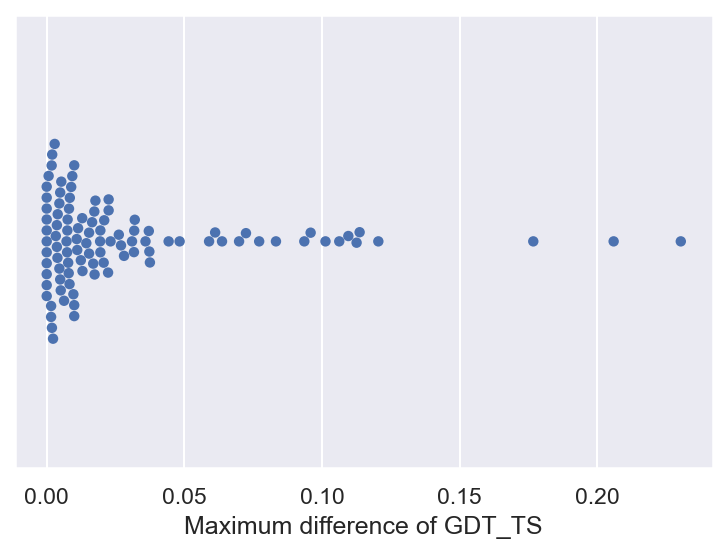

In [20]:
sns.swarmplot(df.groupby('target').apply(get_max_dif).sort_values())
plt.xlabel('Maximum difference of GDT_TS')

## performance evaluation for each class

In [21]:
for name, group in df.groupby('Class'):
    print(name)
    display(eval(group, columns=column_name, label_name='GDT_TS'))

All alpha
25


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.662            0.568        5.518       0.378
1      positive(%)           0.693            0.600        5.820       0.231
2      coverage(%)           0.475            0.462        9.829       0.206
3             DOPE           0.702            0.664        4.795         NaN
4             SOAP           0.615            0.577        3.866         NaN
5           ProQ3D           0.652            0.607        6.134       0.178
6            SBROD           0.642            0.595        5.898         NaN
7       DeepAccNet           0.702            0.634        3.159       0.265
8  DeepAccNet-Bert           0.768            0.722        3.658       0.190
9           P3CMQA           0.805            0.762        4.489       0.106

All beta
25


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.604            0.449        3.289       0.374
1      positive(%)           0.638            0.504        4.563       0.217
2      coverage(%)           0.478            0.315        8.740       0.192
3             DOPE           0.754            0.663        3.780         NaN
4             SOAP           0.623            0.607        4.271         NaN
5           ProQ3D           0.716            0.652        3.094       0.122
6            SBROD           0.634            0.566        6.379         NaN
7       DeepAccNet           0.754            0.681        3.458       0.230
8  DeepAccNet-Bert           0.827            0.749        4.279       0.170
9           P3CMQA           0.853            0.792        2.280       0.095

alpha + beta
25


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.544            0.428        4.098       0.369
1      positive(%)           0.582            0.454        5.567       0.213
2      coverage(%)           0.436            0.340       11.477       0.209
3             DOPE           0.753            0.671        3.326         NaN
4             SOAP           0.637            0.591        3.049         NaN
5           ProQ3D           0.752            0.673        5.402       0.123
6            SBROD           0.709            0.645        6.072         NaN
7       DeepAccNet           0.739            0.674        3.554       0.226
8  DeepAccNet-Bert           0.827            0.748        2.533       0.170
9           P3CMQA           0.837            0.763        3.356       0.100

alpha / beta
25


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.733            0.583        3.479       0.365
1      positive(%)           0.733            0.601        3.657       0.199
2      coverage(%)           0.364            0.318       10.225       0.237
3             DOPE           0.769            0.702        4.152         NaN
4             SOAP           0.694            0.637        4.086         NaN
5           ProQ3D           0.779            0.720        3.616       0.095
6            SBROD           0.718            0.646        4.840         NaN
7       DeepAccNet           0.797            0.710        2.983       0.232
8  DeepAccNet-Bert           0.860            0.796        3.019       0.162
9           P3CMQA           0.859            0.790        2.237       0.084

In [22]:
out_class_list = []
for name, group in df.groupby('Class'):
    print(name)
    class_df = eval(group, columns=column_name, label_name='GDT_TS').set_index('Method')
    class_df = class_df.rename({'GDT_TS Loss': 'Loss', 'GDT_TS Pearson': 'Pearson'}, axis=1)[['Loss', 'Pearson']]
    out_class_list.append(class_df)
pd.concat(out_class_list, axis=1).reset_index()

All alpha
25
All beta
25
alpha + beta
25
alpha / beta
25


Method  Loss  Pearson  Loss  Pearson   Loss  Pearson   Loss  \
0      identity(%) 5.518    0.662 3.289    0.604  4.098    0.544  3.479   
1      positive(%) 5.820    0.693 4.563    0.638  5.567    0.582  3.657   
2      coverage(%) 9.829    0.475 8.740    0.478 11.477    0.436 10.225   
3             DOPE 4.795    0.702 3.780    0.754  3.326    0.753  4.152   
4             SOAP 3.866    0.615 4.271    0.623  3.049    0.637  4.086   
5           ProQ3D 6.134    0.652 3.094    0.716  5.402    0.752  3.616   
6            SBROD 5.898    0.642 6.379    0.634  6.072    0.709  4.840   
7       DeepAccNet 3.159    0.702 3.458    0.754  3.554    0.739  2.983   
8  DeepAccNet-Bert 3.658    0.768 4.279    0.827  2.533    0.827  3.019   
9           P3CMQA 4.489    0.805 2.280    0.853  3.356    0.837  2.237   

   Pearson  
0    0.733  
1    0.733  
2    0.364  
3    0.769  
4    0.694  
5    0.779  
6    0.718  
7    0.797  
8    0.860  
9    0.859

## get MQA performance for each target

In [23]:
import sys
sys.path.append('../../..')
from categorize_target_by_template_quality import categorize_target

comp_methods = column_name
# classify category based on identity, positive, and coverage
category_df = categorize_target(tmscore_df)
# get performance for each taget
eval_df = eval_get_df(df, columns=comp_methods, label_name='GDT_TS')
# merge target information
eval_df = pd.merge(eval_df, target_info_df, on='target', how='left')
eval_df = pd.merge(eval_df, category_df, on='target', how='left')
order_dict = dict(zip(comp_methods, range(len(comp_methods))))
eval_df['order'] = [order_dict[method] for method in eval_df['Method']]
eval_df = eval_df.sort_values(['target', 'order']).drop('order', axis=1).reset_index(drop=True)

eval_df.to_csv(score_dir / 'mqa_result_each_target.csv')
eval_df


100


target           Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  \
0    1AYZ_A      identity(%)           0.466            0.212        4.380   
1    1AYZ_A      positive(%)           0.513            0.257        2.779   
2    1AYZ_A      coverage(%)           0.236            0.167        0.657   
3    1AYZ_A             DOPE           0.780            0.616        1.960   
4    1AYZ_A             SOAP           0.693            0.452        1.960   
..      ...              ...             ...              ...          ...   
995  6SPF_T           ProQ3D           0.698            0.690        2.400   
996  6SPF_T            SBROD           0.329            0.354       36.440   
997  6SPF_T       DeepAccNet           0.660            0.582        0.530   
998  6SPF_T  DeepAccNet-Bert           0.856            0.793        0.530   
999  6SPF_T           P3CMQA           0.860            0.913        0.530   

     GDT_TS MAE         Class  seq_len identity_dist_category  \
0         0.448  alpha + beta      153              multi top   
1         0.237  alpha + beta      153              multi top   
2         0.114  alpha + beta      153              multi top   
3           NaN  alpha + beta      153              multi top   
4           NaN  alpha + beta      153              multi top   
..          ...           ...      ...                    ...   
995       0.200  alpha + beta       94              multi top   
996         NaN  alpha + beta       94              multi top   
997       0.306  alpha + beta       94              multi top   
998       0.235  alpha + beta       94              multi top   
999       0.091  alpha + beta       94              multi top   

    identity_quality_category positive_dist_category  \
0                    Mid-high              multi top   
1                    Mid-high              multi top   
2                    Mid-high              multi top   
3                    Mid-high              multi top   
4                    Mid-high              multi top   
..                        ...                    ...   
995                   Mid-low             the others   
996                   Mid-low             the others   
997                   Mid-low             the others   
998                   Mid-low             the others   
999                   Mid-low             the others   

    positive_quality_category coverage_dist_category  
0                        High             the others  
1                        High             the others  
2                        High             the others  
3                        High             the others  
4                        High             the others  
..                        ...                    ...  
995                    Middle             the others  
996                    Middle             the others  
997                    Middle             the others  
998                    Middle             the others  
999                    Middle             the others  

[1000 rows x 13 columns]

## conduct statistical test

In [24]:
from eval import stat_test

def stat_test_display(eval_df):
    base_method = 'identity(%)'
    metrics_list = ['GDT_TS Pearson', 'GDT_TS Spearman', 'GDT_TS Loss', 'GDT_TS MAE']
    pd.options.display.float_format = '{:.2e}'.format
    display(stat_test(eval_df, base_method, column_name, metrics_list))
    pd.options.display.float_format = '{:.3f}'.format

In [25]:
stat_test_display(eval_df)

Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)             NaN              NaN          NaN         NaN
1      positive(%)        1.65e-05         8.25e-05     2.87e-01    7.79e-18
2      coverage(%)        7.00e-08         6.88e-06     3.46e-10    3.12e-13
3             DOPE        4.75e-05         1.11e-09     7.39e-01         NaN
4             SOAP        8.47e-01         3.86e-05     3.36e-01         NaN
5           ProQ3D        2.10e-04         4.03e-09     7.18e-01    1.46e-17
6            SBROD        6.58e-02         5.58e-05     2.30e-02         NaN
7       DeepAccNet        9.77e-07         3.30e-11     2.97e-02    6.66e-16
8  DeepAccNet-Bert        3.01e-11         5.49e-14     2.78e-02    2.79e-17
9           P3CMQA        4.56e-13         5.05e-15     1.70e-02    6.50e-18

## plot for each class

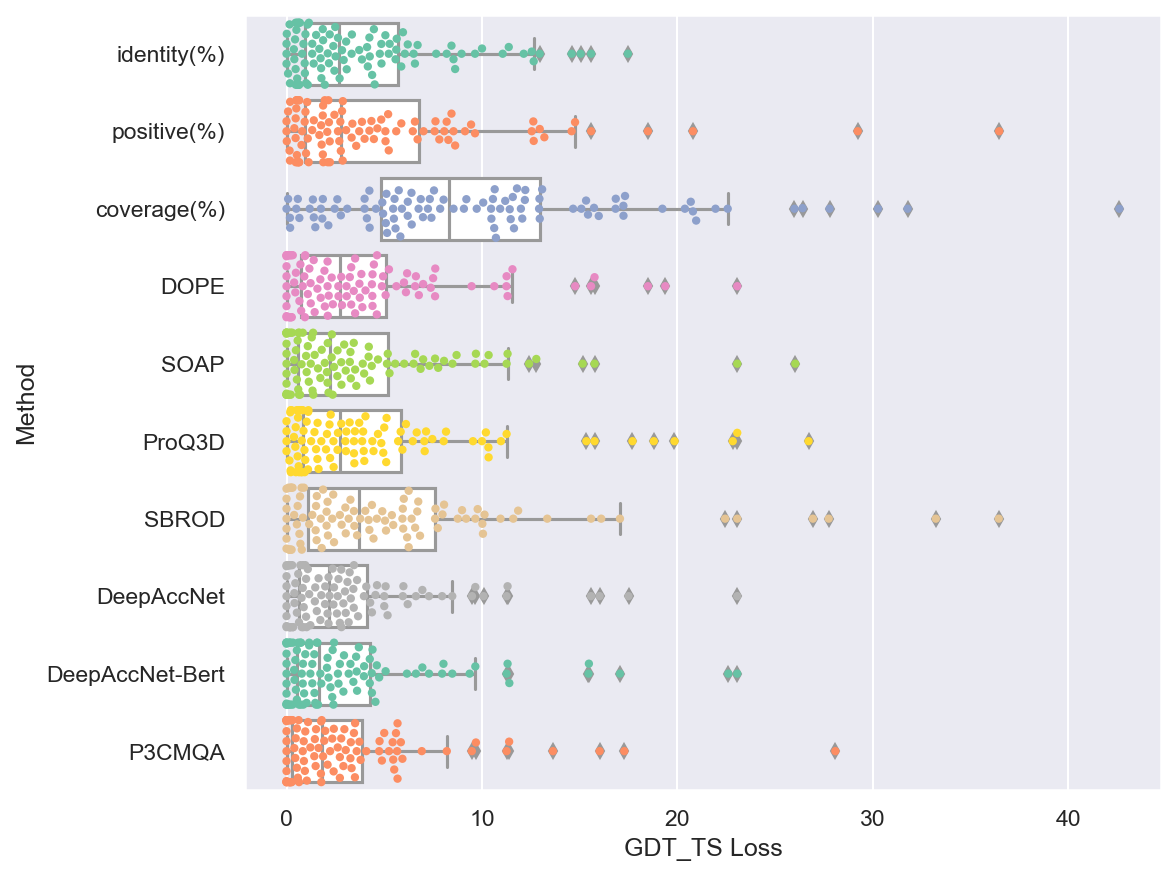

In [26]:
metrics = 'GDT_TS Loss'
hue = None
plot_metrics_group(eval_df, metrics=metrics, hue=hue, figsize=(8, 6), order=column_name)
plt.savefig(plot_dir / 'gdtts_loss_boxplot.png')

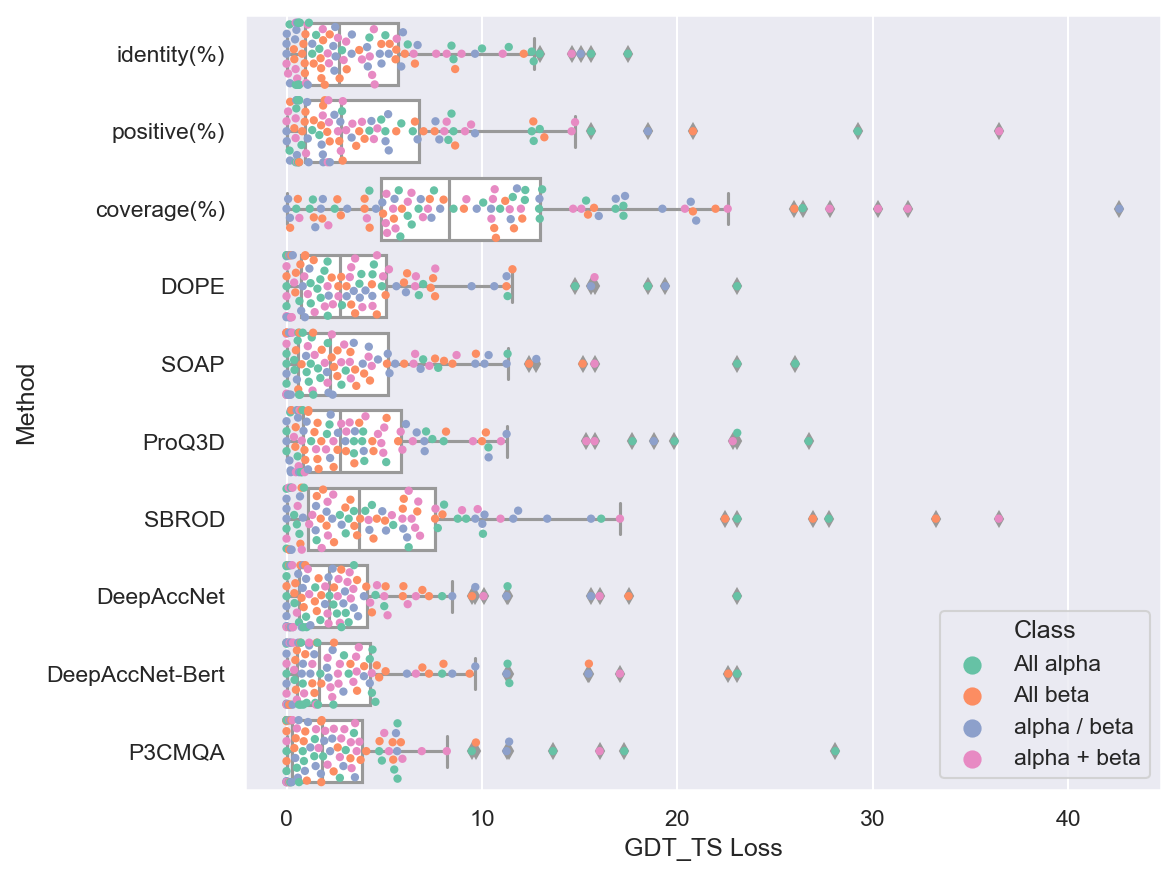

In [27]:
metrics = 'GDT_TS Loss'
hue = 'Class'
class_order = ['All alpha', 'All beta', 'alpha / beta', 'alpha + beta']
plot_metrics_group(eval_df, metrics=metrics, hue=hue, figsize=(8, 6), order=column_name, hue_order=class_order)
plt.savefig(plot_dir / 'gdtts_loss_boxplot_each_class.png')

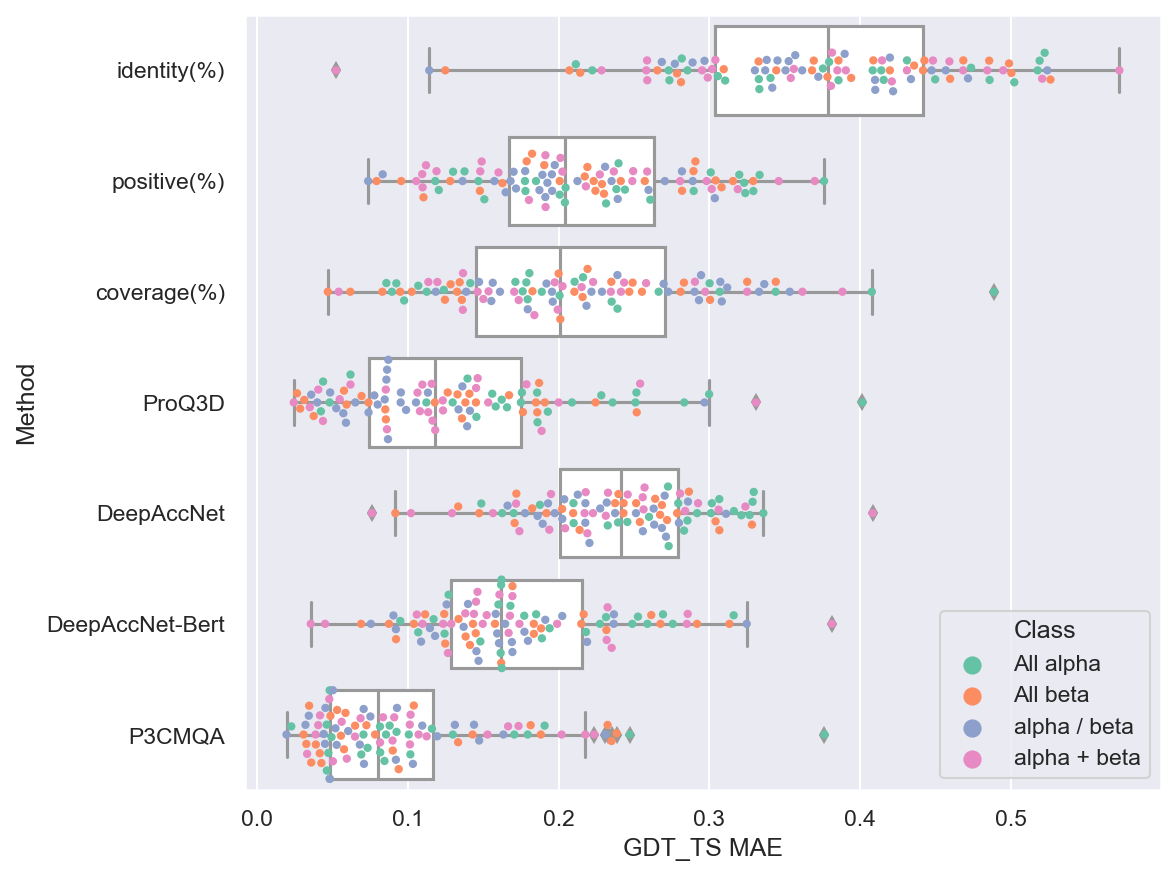

In [28]:
metrics = 'GDT_TS MAE'
hue = 'Class'
outrange_methods = [n.upper() for n in ['dope', 'soap', 'sbrod']]
order = [method for method in column_name if method not in outrange_methods]
plot_metrics_group(eval_df.query('Method not in @outrange_methods'), metrics=metrics, hue=hue, figsize=(8, 6), order=order, hue_order=class_order)
plt.savefig(plot_dir / 'gdtts_MAE_boxplot_each_class.png')

## Performance comparison for each category of identity and positive

In [29]:
category_df

identity_dist_category identity_quality_category  \
target                                                    
1AYZ_A              multi top                  Mid-high   
1AZ5_A              multi top                      High   
1BQU_A              multi top                      High   
1DE4_A             the others                       Low   
1EA9_C             the others                  Mid-high   
...                       ...                       ...   
6K9F_B             the others                       Low   
6KNA_A             the others                  Mid-high   
6KWQ_A                    top                      High   
6O8W_g              multi top                      High   
6SPF_T              multi top                   Mid-low   

       positive_dist_category positive_quality_category coverage_dist_category  
target                                                                          
1AYZ_A              multi top                      High             the others  
1AZ5_A              multi top                      High             the others  
1BQU_A              multi top                      High             the others  
1DE4_A             the others                       Low             the others  
1EA9_C             the others                    Middle             the others  
...                       ...                       ...                    ...  
6K9F_B             the others                       Low             the others  
6KNA_A             the others                      High             the others  
6KWQ_A                    top                      High             the others  
6O8W_g              multi top                      High             the others  
6SPF_T             the others                    Middle             the others  

[100 rows x 5 columns]

In [30]:
for column in category_df.columns:
    print(category_df.value_counts(column))

identity_dist_category
the others    50
multi top     41
top            9
dtype: int64
identity_quality_category
Mid-low     39
High        24
Mid-high    23
Low         14
dtype: int64
positive_dist_category
the others    51
multi top     43
top            6
dtype: int64
positive_quality_category
Middle    45
High      37
Low       18
dtype: int64
coverage_dist_category
the others    95
multi top      5
dtype: int64


In [31]:
concat_df = pd.merge(df, category_df, left_on='target', right_index=True)
concat_df

model  GDT_TS  GDT_HA  TMscore  target  template  seq_len  \
0      1AYZ_A_3OJ4_A_2_1   0.864   0.704    0.912  1AYZ_A  3OJ4_A_2      153   
1      1AYZ_A_4L83_A_3_3   0.858   0.678    0.907  1AYZ_A  4L83_A_3      153   
2      1AYZ_A_6TTU_D_1_5   0.851   0.678    0.898  1AYZ_A  6TTU_D_1      153   
3      1AYZ_A_4GPR_A_1_1   0.842   0.688    0.872  1AYZ_A  4GPR_A_1      153   
4      1AYZ_A_1TTE_A_3_5   0.657   0.423    0.787  1AYZ_A  1TTE_A_3      153   
...                  ...     ...     ...      ...     ...       ...      ...   
14620  6SPF_T_3PYO_T_2_1   0.862   0.707    0.853  6SPF_T  3PYO_T_2       94   
14621  6SPF_T_3J7Y_U_3_1   0.614   0.444    0.598  6SPF_T  3J7Y_U_3       94   
14622  6SPF_T_1PNU_R_2_4   0.790   0.590    0.775  6SPF_T  1PNU_R_2       94   
14623  6SPF_T_5O60_U_3_4   0.832   0.692    0.840  6SPF_T  5O60_U_3       94   
14624  6SPF_T_4BTD_X_2_1   0.891   0.750    0.891  6SPF_T  4BTD_X_2       94   

       identity  positive  coverage  ...  SBROD  ProQ2D  ProQRosCenD  \
0            55        89       145  ...  1.496   0.592        0.748   
1            50        82       150  ...  1.502   0.607        0.733   
2            56        90       143  ...  1.463   0.554        0.671   
3            55        89       139  ...  1.475   0.512        0.566   
4            44        79       149  ...  1.404   0.509        0.537   
...         ...       ...       ...  ...    ...     ...          ...   
14620        42        56        88  ...  1.337   0.432        0.721   
14621        27        46        92  ...  1.306   0.348        0.532   
14622        37        54        87  ...  1.316   0.393        0.463   
14623        36        49        87  ...  1.329   0.446        0.657   
14624        42        56        88  ...  1.343   0.446        0.569   

       ProQRosFAD ProQ3D  identity_dist_category  identity_quality_category  \
0           0.886  0.675               multi top                   Mid-high   
1           0.888  0.721               multi top                   Mid-high   
2           0.810  0.622               multi top                   Mid-high   
3           0.809  0.581               multi top                   Mid-high   
4           0.658  0.510               multi top                   Mid-high   
...           ...    ...                     ...                        ...   
14620       0.816  0.680               multi top                    Mid-low   
14621       0.622  0.464               multi top                    Mid-low   
14622       0.443  0.436               multi top                    Mid-low   
14623       0.823  0.657               multi top                    Mid-low   
14624       0.793  0.641               multi top                    Mid-low   

       positive_dist_category  positive_quality_category  \
0                   multi top                       High   
1                   multi top                       High   
2                   multi top                       High   
3                   multi top                       High   
4                   multi top                       High   
...                       ...                        ...   
14620              the others                     Middle   
14621              the others                     Middle   
14622              the others                     Middle   
14623              the others                     Middle   
14624              the others                     Middle   

       coverage_dist_category  
0                  the others  
1                  the others  
2                  the others  
3                  the others  
4                  the others  
...                       ...  
14620              the others  
14621              the others  
14622              the others  
14623              the others  
14624              the others  

[14625 rows x 58 columns]

In [32]:
# based on identity distribution
methods = ['identity(%)', 'positive(%)', 'coverage(%)', 'DeepAccNet-Bert', 'P3CMQA']
for name, group in concat_df.groupby('identity_dist_category'):
    print(name)
    display(eval(group, columns=methods, label_name='GDT_TS'))

multi top
41


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.661            0.481        3.177       0.384
1      positive(%)           0.693            0.533        3.659       0.220
2      coverage(%)           0.445            0.360        9.828       0.197
3  DeepAccNet-Bert           0.817            0.752        3.159       0.175
4           P3CMQA           0.822            0.769        2.459       0.085

the others
50


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.602            0.528        5.244       0.359
1      positive(%)           0.623            0.542        6.461       0.212
2      coverage(%)           0.400            0.345       10.366       0.226
3  DeepAccNet-Bert           0.807            0.745        3.697       0.168
4           P3CMQA           0.836            0.775        3.475       0.105

top
9


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.709            0.511        1.900       0.381
1      positive(%)           0.734            0.554        1.900       0.210
2      coverage(%)           0.618            0.432        9.505       0.184
3  DeepAccNet-Bert           0.914            0.808        2.539       0.190
4           P3CMQA           0.926            0.821        3.833       0.103

In [33]:
# based on identity distribution
limited_methods = ['identity(%)', 'positive(%)', 'DeepAccNet-Bert', 'P3CMQA']
for name, group in concat_df.groupby('identity_dist_category'):
    print(name)
    display(eval(group, columns=limited_methods, label_name='GDT_TS').rename({'GDT_TS Loss': 'Loss', 'GDT_TS Pearson': 'Pearson'}, axis=1)[['Method', 'Loss', 'Pearson']])

multi top
41


Method  Loss  Pearson
0      identity(%) 3.177    0.661
1      positive(%) 3.659    0.693
2  DeepAccNet-Bert 3.159    0.817
3           P3CMQA 2.459    0.822

the others
50


Method  Loss  Pearson
0      identity(%) 5.244    0.602
1      positive(%) 6.461    0.623
2  DeepAccNet-Bert 3.697    0.807
3           P3CMQA 3.475    0.836

top
9


Method  Loss  Pearson
0      identity(%) 1.900    0.709
1      positive(%) 1.900    0.734
2  DeepAccNet-Bert 2.539    0.914
3           P3CMQA 3.833    0.926

In [34]:
# based on identity quality
for name, group in concat_df.groupby('identity_quality_category'):
    print(name)
    display(eval(group, columns=methods, label_name='GDT_TS'))

High
24


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.726            0.581        4.357       0.316
1      positive(%)           0.751            0.607        4.788       0.187
2      coverage(%)           0.472            0.390       10.483       0.200
3  DeepAccNet-Bert           0.762            0.672        5.760       0.187
4           P3CMQA           0.814            0.731        5.377       0.088

Low
14


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.491            0.402        4.908       0.396
1      positive(%)           0.525            0.426        7.175       0.229
2      coverage(%)           0.392            0.341       10.044       0.258
3  DeepAccNet-Bert           0.851            0.796        1.954       0.146
4           P3CMQA           0.870            0.808        2.096       0.086

Mid-high
23


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.652            0.498        3.544       0.359
1      positive(%)           0.682            0.536        4.014       0.210
2      coverage(%)           0.489            0.408        8.516       0.202
3  DeepAccNet-Bert           0.848            0.781        3.056       0.176
4           P3CMQA           0.866            0.814        1.981       0.091

Mid-low
39


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.623            0.504        3.969       0.404
1      positive(%)           0.643            0.541        4.679       0.230
2      coverage(%)           0.404            0.318       10.736       0.205
3  DeepAccNet-Bert           0.830            0.773        2.598       0.172
4           P3CMQA           0.825            0.772        2.695       0.109

In [35]:
# based on maximum identity value
for name, group in concat_df.groupby('identity_quality_category'):
    print(name)
    display(eval(group, columns=limited_methods, label_name='GDT_TS').rename({'GDT_TS Loss': 'Loss', 'GDT_TS Pearson': 'Pearson'}, axis=1)[['Method', 'Loss', 'Pearson']])

High
24


Method  Loss  Pearson
0      identity(%) 4.357    0.726
1      positive(%) 4.788    0.751
2  DeepAccNet-Bert 5.760    0.762
3           P3CMQA 5.377    0.814

Low
14


Method  Loss  Pearson
0      identity(%) 4.908    0.491
1      positive(%) 7.175    0.525
2  DeepAccNet-Bert 1.954    0.851
3           P3CMQA 2.096    0.870

Mid-high
23


Method  Loss  Pearson
0      identity(%) 3.544    0.652
1      positive(%) 4.014    0.682
2  DeepAccNet-Bert 3.056    0.848
3           P3CMQA 1.981    0.866

Mid-low
39


Method  Loss  Pearson
0      identity(%) 3.969    0.623
1      positive(%) 4.679    0.643
2  DeepAccNet-Bert 2.598    0.830
3           P3CMQA 2.695    0.825

In [36]:
# based on identity distribution
for name, group in concat_df.groupby('identity_dist_category'):
    # print(name)
    for _name, _group in group.groupby('identity_quality_category'):
        # if _name != 'High':
        #     continue
        print(name, _name)
        display(eval(_group, columns=methods, label_name='GDT_TS'))

multi top High
12


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.686            0.499        2.876       0.342
1      positive(%)           0.706            0.507        2.932       0.189
2      coverage(%)           0.384            0.323        9.939       0.191
3  DeepAccNet-Bert           0.754            0.691        5.547       0.170
4           P3CMQA           0.745            0.666        4.978       0.070

multi top Low
1


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.680            0.324        3.330       0.351
1      positive(%)           0.741            0.482        3.330       0.196
2      coverage(%)           0.820            0.876        1.760       0.295
3  DeepAccNet-Bert           0.868            0.831        1.220       0.090
4           P3CMQA           0.913            0.880        1.220       0.060

multi top Mid-high
15


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.614            0.456        3.946       0.391
1      positive(%)           0.651            0.505        4.581       0.224
2      coverage(%)           0.482            0.425        9.367       0.177
3  DeepAccNet-Bert           0.824            0.772        3.370       0.180
4           P3CMQA           0.839            0.795        2.094       0.075

multi top Mid-low
13


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.692            0.505        2.557       0.417
1      positive(%)           0.725            0.594        3.292       0.247
2      coverage(%)           0.425            0.276       10.877       0.220
3  DeepAccNet-Bert           0.862            0.779        0.861       0.178
4           P3CMQA           0.866            0.828        0.651       0.112

the others High
7


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.816            0.738        7.953       0.231
1      positive(%)           0.836            0.767        9.337       0.175
2      coverage(%)           0.454            0.450       12.359       0.252
3  DeepAccNet-Bert           0.675            0.568        7.309       0.197
4           P3CMQA           0.849            0.807        5.346       0.103

the others Low
13


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.476            0.408        5.030       0.400
1      positive(%)           0.509            0.422        7.471       0.231
2      coverage(%)           0.359            0.300       10.681       0.255
3  DeepAccNet-Bert           0.850            0.794        2.010       0.150
4           P3CMQA           0.866            0.803        2.164       0.088

the others Mid-high
5


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.694            0.645        4.028       0.261
1      positive(%)           0.717            0.638        4.283       0.172
2      coverage(%)           0.441            0.353        6.497       0.262
3  DeepAccNet-Bert           0.871            0.778        3.484       0.165
4           P3CMQA           0.912            0.847        2.350       0.146

the others Mid-low
25


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.589            0.508        4.841       0.394
1      positive(%)           0.604            0.523        5.566       0.220
2      coverage(%)           0.398            0.337       10.418       0.197
3  DeepAccNet-Bert           0.809            0.763        3.606       0.170
4           P3CMQA           0.801            0.737        3.857       0.106

top High
5


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.694            0.558        2.876       0.372
1      positive(%)           0.741            0.623        2.876       0.198
2      coverage(%)           0.693            0.455        9.165       0.152
3  DeepAccNet-Bert           0.901            0.770        4.106       0.212
4           P3CMQA           0.929            0.780        6.376       0.109

top Mid-high
3


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.769            0.467        0.729       0.365
1      positive(%)           0.780            0.520        0.729       0.206
2      coverage(%)           0.604            0.417        7.625       0.226
3  DeepAccNet-Bert           0.930            0.832        0.773       0.172
4           P3CMQA           0.927            0.855        0.800       0.081

top Mid-low
1


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.599            0.403        0.532       0.472
1      positive(%)           0.558            0.309        0.532       0.282
2      coverage(%)           0.282            0.361       16.845       0.222
3  DeepAccNet-Bert           0.932            0.930        0.000       0.140
4           P3CMQA           0.903            0.919        0.220       0.144

In [37]:
for name, group in concat_df.groupby('positive_dist_category'):
    print(name)
    display(eval(group, columns=methods, label_name='GDT_TS'))

multi top
43


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.631            0.447        2.611       0.379
1      positive(%)           0.664            0.488        2.953       0.218
2      coverage(%)           0.459            0.357        9.932       0.212
3  DeepAccNet-Bert           0.829            0.761        3.152       0.165
4           P3CMQA           0.833            0.771        2.846       0.090

the others
51


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.630            0.555        5.607       0.363
1      positive(%)           0.650            0.578        6.899       0.213
2      coverage(%)           0.403            0.357       10.189       0.212
3  DeepAccNet-Bert           0.800            0.741        3.626       0.177
4           P3CMQA           0.832            0.777        3.122       0.099

top
6


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.717            0.531        1.895       0.389
1      positive(%)           0.742            0.589        1.895       0.219
2      coverage(%)           0.580            0.392       10.011       0.187
3  DeepAccNet-Bert           0.928            0.811        2.797       0.191
4           P3CMQA           0.932            0.816        4.575       0.119

In [38]:
for name, group in concat_df.groupby('positive_quality_category'):
    print(name)
    display(eval(group, columns=methods, label_name='GDT_TS'))

High
37


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.709            0.545        4.204       0.325
1      positive(%)           0.736            0.574        4.447       0.193
2      coverage(%)           0.483            0.399        9.742       0.207
3  DeepAccNet-Bert           0.796            0.704        4.971       0.179
4           P3CMQA           0.841            0.766        4.330       0.091

Low
18


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.553            0.484        5.060       0.403
1      positive(%)           0.595            0.515        6.431       0.236
2      coverage(%)           0.381            0.359       11.302       0.238
3  DeepAccNet-Bert           0.866            0.812        1.570       0.150
4           P3CMQA           0.867            0.812        1.931       0.089

Middle
45


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0      identity(%)           0.609            0.486        3.621       0.397
1      positive(%)           0.627            0.521        4.663       0.225
2      coverage(%)           0.425            0.327        9.843       0.203
3  DeepAccNet-Bert           0.822            0.771        2.779       0.177
4           P3CMQA           0.824            0.772        2.536       0.104

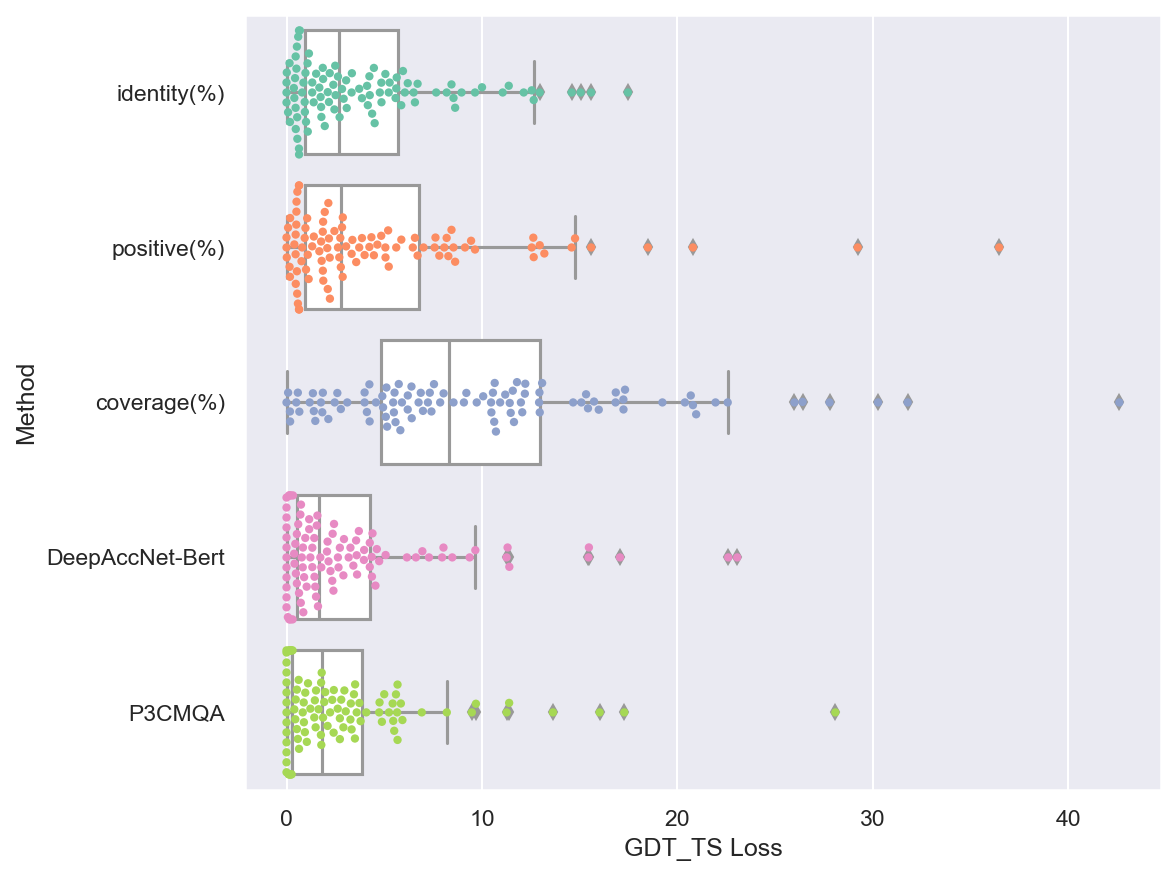

In [39]:
metrics = 'GDT_TS Loss'
hue = None
dist_order = ['top', 'multi top', 'the others']
plot_metrics_group(eval_df, metrics=metrics, hue=hue, figsize=(8, 6), pointsize=4, order=methods, hue_order=dist_order)

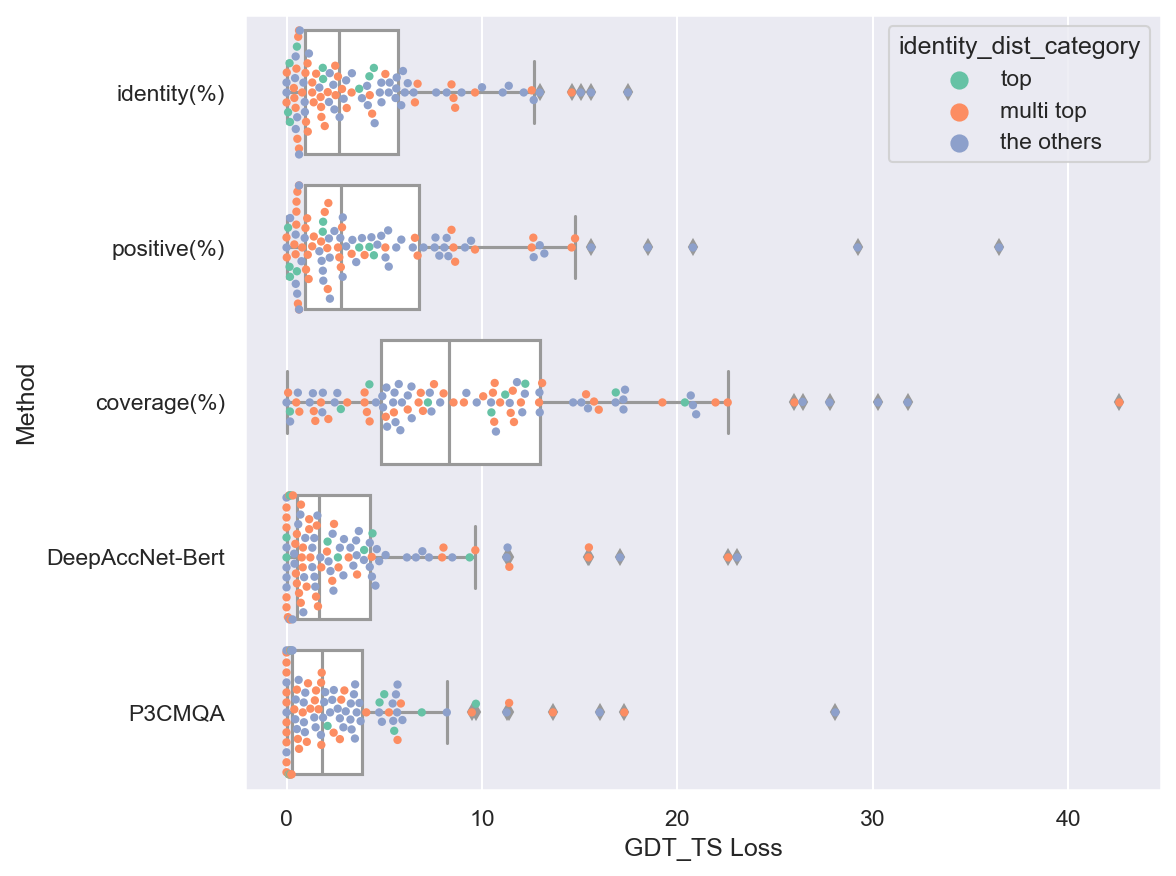

In [40]:
metrics = 'GDT_TS Loss'
hue = 'identity_dist_category'
dist_order = ['top', 'multi top', 'the others']
plot_metrics_group(eval_df, metrics=metrics, hue=hue, figsize=(8, 6), pointsize=4, order=methods, hue_order=dist_order)

<AxesSubplot:xlabel='GDT_TS Loss', ylabel='target'>

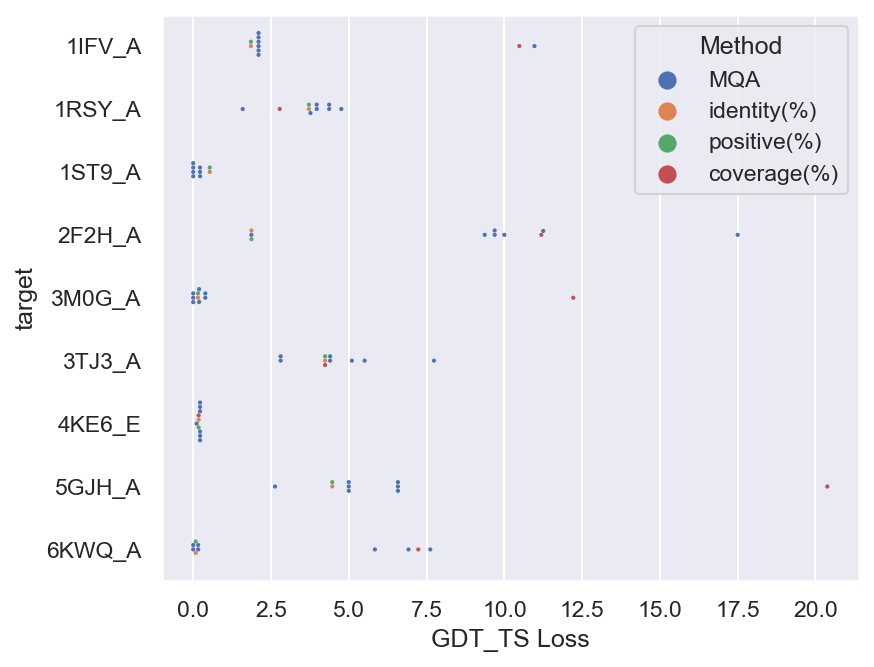

In [41]:
plt.figure(figsize=(6, 5))
identity_top_df = eval_df.query('identity_dist_category == "top"')
x = 'GDT_TS Loss'
templated_quality_metrics = ['identity(%)', 'positive(%)', 'coverage(%)']
identity_top_df_copy = identity_top_df.copy()
identity_top_df_copy['Method'] = [method if method in templated_quality_metrics else 'MQA' for method in identity_top_df['Method']]
hue_order = ['MQA'] + templated_quality_metrics
sns.swarmplot(data=identity_top_df_copy, x=x, y='target', hue='Method', size=2, hue_order=hue_order)

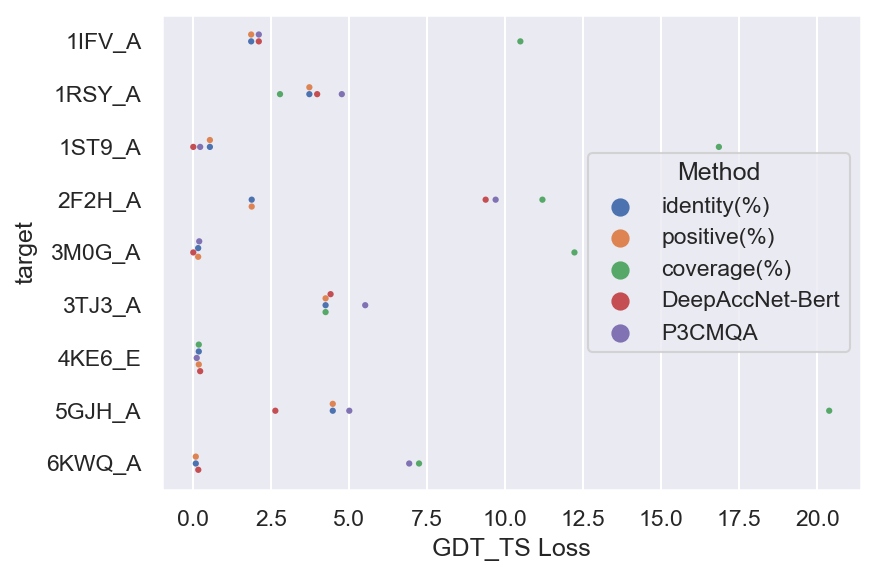

In [42]:
# based on identity distribution
x = 'GDT_TS Loss'
sns.swarmplot(data=identity_top_df, x=x, y='target', hue='Method', hue_order=methods, size=3)
plt.tight_layout()
plt.savefig(plot_dir / 'gdtts_loss_identity_dist_category_top_5methods.png')

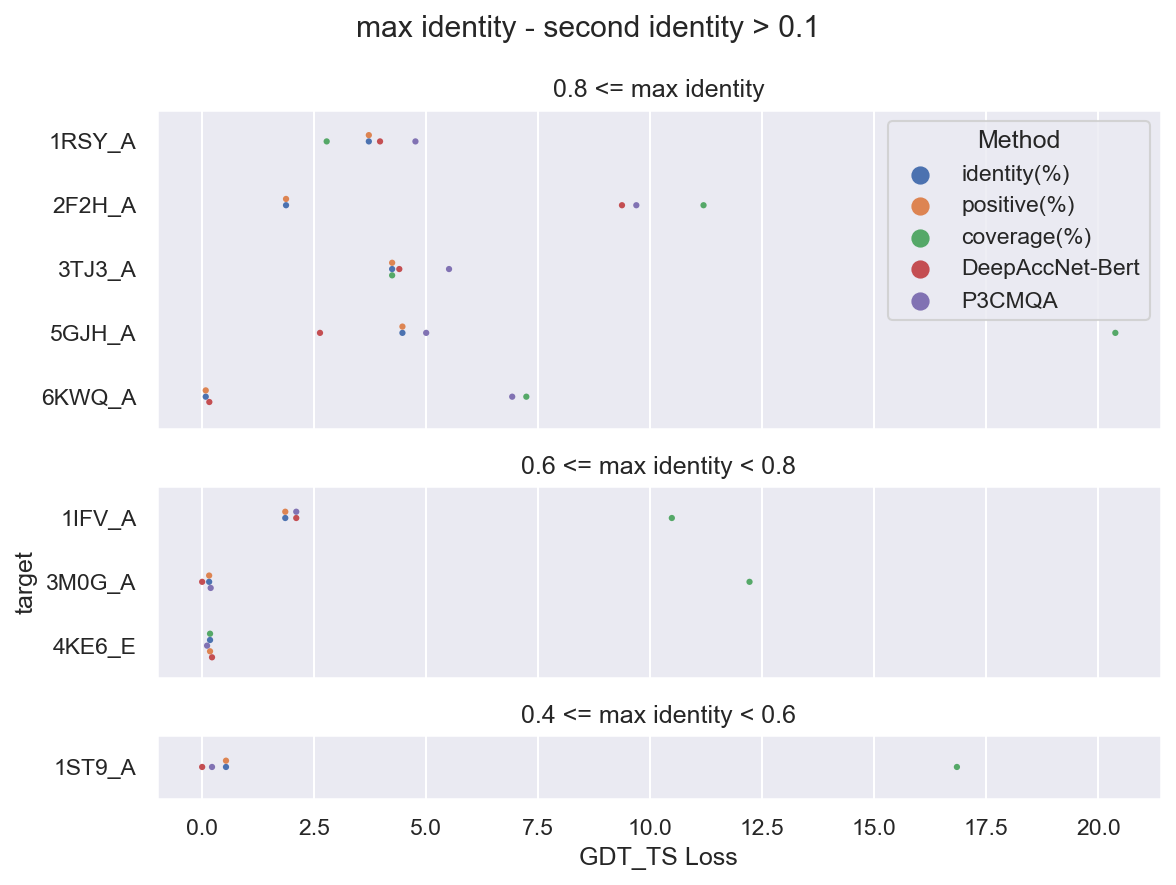

In [43]:
figsize = (8, 6)
data = identity_top_df
cateogry_label = 'identity_quality_category'
categories = ["High", "Mid-high", "Mid-low", "Low"]
titles = ['0.8 <= max identity', '0.6 <= max identity < 0.8', '0.4 <= max identity < 0.6', 'max_identity < 0.4']
existing_categories = data[cateogry_label].unique()
categories = [c for c in categories if c in existing_categories]
existing_index = [i for i, c in enumerate(categories) if c in existing_categories]
titles = [titles[i] for i in existing_index]
hue_order = methods
ratios = list(data.query('Method == @hue_order').value_counts(cateogry_label)[categories])
fig, axes = plt.subplots(nrows=len(categories), ncols=1, sharex=True, sharey=False, figsize=figsize, gridspec_kw={'height_ratios': ratios})
x = 'GDT_TS Loss'
y = 'target'
hue = 'Method'
hue_order = methods
size = 3
for i, category in enumerate(categories):
    sns.swarmplot(data=data.query('{} == @category'.format(cateogry_label)), x=x, y=y, hue=hue, hue_order=hue_order, size=size, ax=axes[i])
    axes[i].set_title(titles[i])
    if i != 0:
        axes[i].get_legend().remove()
    if i != 1:
        axes[i].set_ylabel('')
    if i != 2:
        axes[i].set_xlabel('')
fig.suptitle('max identity - second identity > 0.1')
plt.tight_layout()
plt.savefig(plot_dir / 'gdtts_loss_identity_dist_top_identity_quality_5methods.png')

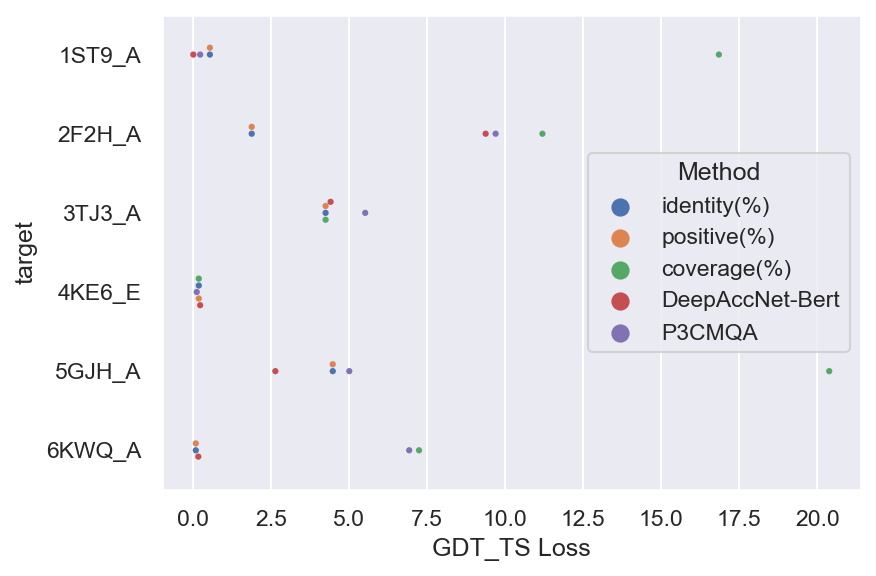

In [44]:
# based on positive distribution
x = 'GDT_TS Loss'
data = eval_df.query('positive_dist_category == "top"')
sns.swarmplot(data=data, x=x, y='target', hue='Method', hue_order=methods, size=3)
plt.tight_layout()
plt.savefig(plot_dir / 'gdtts_loss_positive_dist_category_top_5methods.png')

## Scatter plot of P3CMQA

In [45]:
scatter(df, x='GDT_TS', y='P3CMQA', col_wrap=10)
plt.savefig(plot_dir / 'p3cmqa_gdtts_scatter.png')